In [1]:
from decouple import config
from mvpa_functions import load_pickle, ados
import glob
import pandas as pd
import re
import nilearn.plotting as nplot
import os
import re
from nilearn.reporting import get_clusters_table
from nilearn import image as img

In [5]:
ados_df = ados('G2', mean_images=True)

In [3]:
hc_ados = ados('G1')

In [15]:
path_to_models = os.path.join(config('ml'), 'pickle', 'individual_scans')

ml_models = dict(zip([re.sub('.pickle', '', key) for key in os.listdir(path_to_models)], 
                     [load_pickle(re.sub('\.pickle', '', os.path.join(path_to_models, pickle))) for pickle in os.listdir(path_to_models)]))

In [22]:
import matplotlib.pyplot as plt
import numpy as np
y_pred = ml_models['ADOS_Interaction'].predict(ados_long['paths']).ravel()

[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 48),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals


In [23]:
ados_long['ADOS_Communication'].shape

(48,)

In [24]:
mse = np.mean(np.abs(ados_long['ADOS_Interaction'] - y_pred))
print(f"Mean square error (MSE) on the predicted ADOS com: {mse}")

Mean square error (MSE) on the predicted ADOS com: 1.2454763240010713


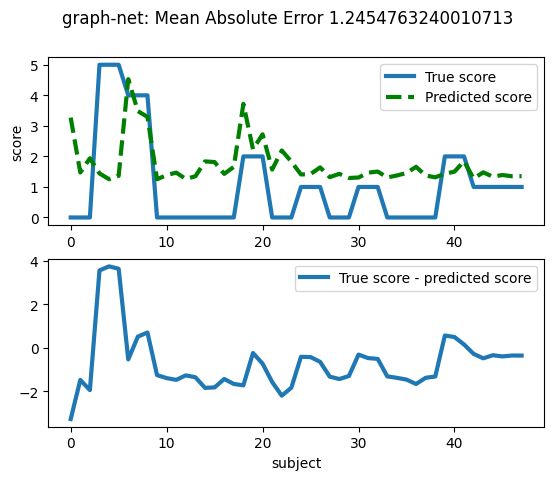

In [21]:
plt.figure()
plt.suptitle(f"graph-net: Mean Absolute Error {mse}")
linewidth = 3
ax1 = plt.subplot(211)
ax1.plot(ados_long['ADOS_Interaction'], label="True score", linewidth=linewidth)
ax1.plot(y_pred, "--", c="g", label="Predicted score", linewidth=linewidth)
ax1.set_ylabel("score")
plt.legend(loc="best")
ax2 = plt.subplot(212)
ax2.plot(
    ados_long['ADOS_Interaction'] - y_pred, label="True score - predicted score", linewidth=linewidth
)
ax2.set_xlabel("subject")
plt.legend(loc="best")

In [50]:
for key in ml_models.keys():
    r2 = ml_models[key].score(ados_long['paths'], ados_long[key])
    print(key, r2)

[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 48),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
ADOS_com_soc -0.5624905158685032
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 48),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
ADOS_Communication -0.3810135732304367
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 48),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
      

In [56]:
p = ml_models['ADOS_Communication'].cv_

In [40]:
table_df = get_clusters_table(tv_1_model_interaction.coef_img_, stat_threshold=0.001, cluster_threshold=0)

In [41]:
table_df_int = get_clusters_table(tv_1_model.coef_img_, stat_threshold=0.001, cluster_threshold=0)

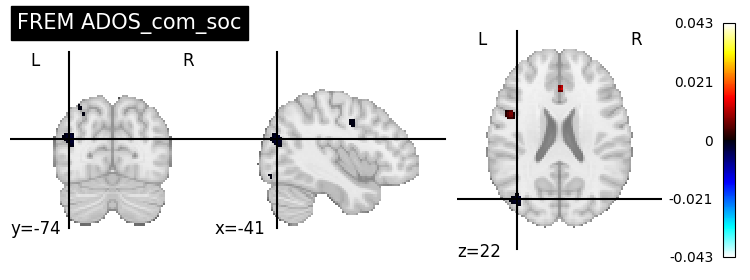

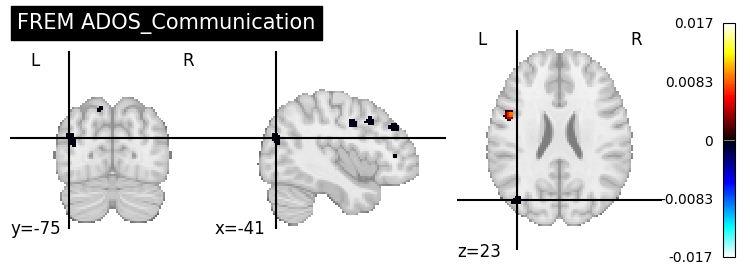

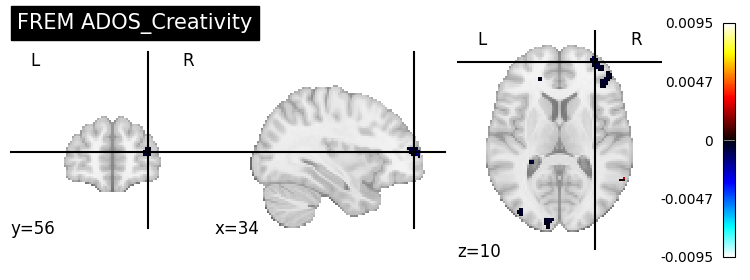

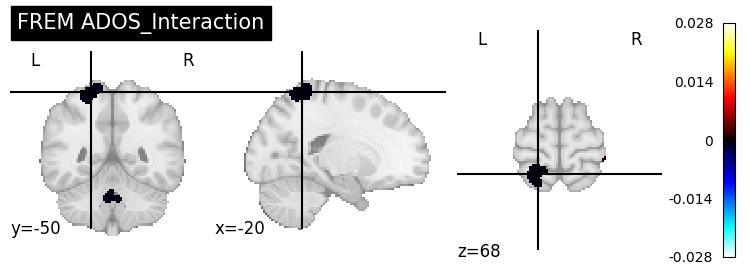

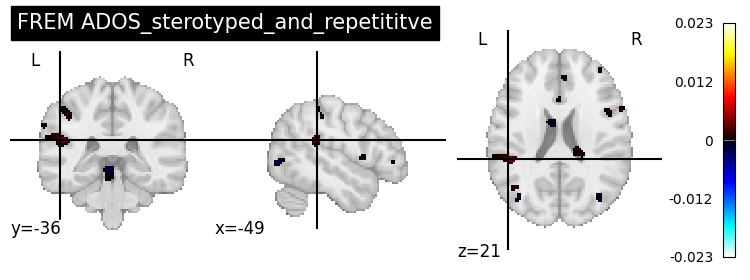

In [8]:
for domain in frem_dictionary:
    nplot.plot_stat_map(
        frem_dictionary[domain]['ml'].coef_img_,
        title=f"FREM {domain}",
        threshold=0.0001
    )